In [1]:
import math
import re
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams['mathtext.fontset'] = 'cm'
matplotlib.rcParams['font.size'] = 17

In [2]:
def read_data():
    vacf_all = []
    vacf_1 = []
    vacf_2 = []
    check = 0
    
    M1 = 238.03**(1/2.0)
    M2 = 95.95**(1/2.0)
    
    fi = open(path+'DOS.out', 'r')
    for k in range(100000):
        st = fi.readline()
        #print(st[0:4])
        if st[0:4] == "Step":
            check = check + 1
            print(check)
        if check == 2:
            break
    for k in range(t_vacf):
        st = fi.readline()
        if st[0:4] == "Loop":
            break
        data = st.rstrip().split()
        #print(st)
        vacf_all.append([float(data[0])*step-t0,float(data[8])])
        #vacf_1.append([float(data[0])*step-t0,float(data[9])])
        #vacf_2.append([float(data[0])*step-t0,float(data[10])])
    fi.close()

    vacf_all = np.asmatrix(vacf_all)
    #vacf_1 = np.asmatrix(vacf_1)
    #vacf_2 = np.asmatrix(vacf_2)
    
    v = np.copy(vacf_all[0,1])
    #v1 = np.copy(vacf_1[0,1])
    #v2 = np.copy(vacf_2[0,1])
    print("len of all vacf", vacf_all.shape)
    for i in range(len(vacf_all)):
        vacf_all[i,1] = (M1**2*vacf_all[i,1])/(M1**2*v)
        #vacf_1[i,1] = (M1**2*vacf_1[i,1])/(M1**2*v1 + M2**2*v2)
        #vacf_2[i,1] = (M2**2*vacf_2[i,1])/(M1**2*v1 + M2**2*v2)

    
    fo = open('VACF.dat','w')
    fo.write('Time, ps Autocorr \n')
    for i in range(len(vacf_all)):
        fo.write('%f %f \n' % (vacf_all[i,0],vacf_all[i,1]))
    fo.close()
    
    #fo = open('VACF_1.dat','w')
    #fo.write('Time, ps Autocorr \n')
    #for i in range(len(vacf_1)):
    #    fo.write('%f %f \n' % (vacf_1[i,0],vacf_1[i,1]))
    #fo.close()
    #fo = open('VACF_2.dat','w')
    #fo.write('Time, ps Autocorr \n')
    #for i in range(len(vacf_2)):
    #    fo.write('%f %f \n' % (vacf_2[i,0],vacf_2[i,1]))
    #fo.close()
    return vacf_1, vacf_2, vacf_all

In [3]:
def PDOS(vacf,v,nAt):
    gr = 0
    gr = np.sum(np.multiply(np.cos(2*3.141592654*v*vacf[:,0]),vacf[:,1])*step)
	#for i in range(vacf.shape[0]):
#		gr = gr + math.cos(2*3.141592654*v*vacf[i,0])*vacf[i,1]*step
	#l = vacf.shape[0]
	#gr = np.sum(math.cos(2*3.141592654*np.repeat(v,l)*vacf[:,0])*vacf[:,1]*np.repeat(step,l))
    return gr#*nAt/(nAt1+nAt2)

In [4]:
def integ(pdos):
	sum = 0
	vcut = freq[-1]
	for i in range(len(pdos)):
		sum = sum + pdos[i][1]*(freq[1]-freq[0])
		if sum > 1:
			vcut = pdos[i][0]
			break
	print("Integral =", sum)
	print ("vcut =", vcut)
	return vcut, sum

In [5]:
def write_vacf(vacf, pdos_name, nAt):
    p = []
    for v in freq:
        p_tmp = PDOS(vacf,v,nAt)
        if v == 0:
            p0 = p_tmp
        p_tmp = p_tmp #- p0
        p.append([v,p_tmp])

    vc, integral  = integ(p)
    #print(vc, integral)
    #p2 = [[x[0],x[1]*1.0/integral] for x in p]
    p2 = [[x[0],x[1]*1.0] for x in p]

    fo = open(pdos_name,'w')
    for x in p2:
        fo.write("%f %f \n" % (x[0], x[1]))
    fo.close()
    return p2

In [1]:
dnu = 0.05
freq = np.array([i*dnu for i in range(0,800)])
mask_value = re.compile('[+-]?\d+\.?\d*e?[+-]?\d*')
#mask_line = re.compile('temperature\s*\d+')
mask_energy = re.compile('\s+0\s+0\s*\d+')

step = 0.001
t0 = 0
t_vacf = 2000
type1 = 'Pb'
type2 = 'Mo'

n = 30
c = 0
nAt = 4*n*n*n
nAt1 = nAt*(100-c)/100
nAt2 = nAt*c/100
path = "./"

NameError: name 'np' is not defined

In [7]:
vacf_1, vacf_2, vacf_all = read_data()

1
2
len of all vacf (3000, 2)


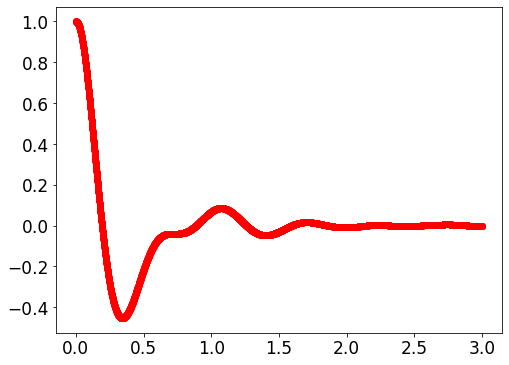

In [8]:
fig = plt.figure(figsize=(8,6))
plt.plot(vacf_all[:,0], vacf_all[:,1], 'or')
#plt.plot(vacf_1[:,0], vacf_1[:,1], 'ob')
#plt.plot(vacf_2[:,0], vacf_2[:,1], 'og')
plt.show()

In [9]:
#write_vacf(vacf_all, path+'PDOS_all.dat')
pdos_all = np.asmatrix(write_vacf(vacf_all, path+'PDOS_{0}.dat'.format('all'), nAt))
#pdos1 = np.asmatrix(write_vacf(vacf_1, path+'PDOS_{0}.dat'.format(type1), nAt1))
#pdos2 = np.asmatrix(write_vacf(vacf_2, path+'PDOS_{0}.dat'.format(type2), nAt2))
import copy

#pdos_total = copy.deepcopy(pdos1)
#pdos_total[:,1] += pdos2[:, 1]
#0.7391632209175192+0.18972116869799943


Integral = 0.2700075336930455
vcut = 39.95


In [10]:
T = 659
kb = 8.6*10**(-2)

def riemannint(f,dx):
    """Compute Riemann integral"""
    return np.sum(f)*dx

def thermo(freq, T):
    return freq/(kb*T)/(1 - np.exp(-freq/(kb*T)))

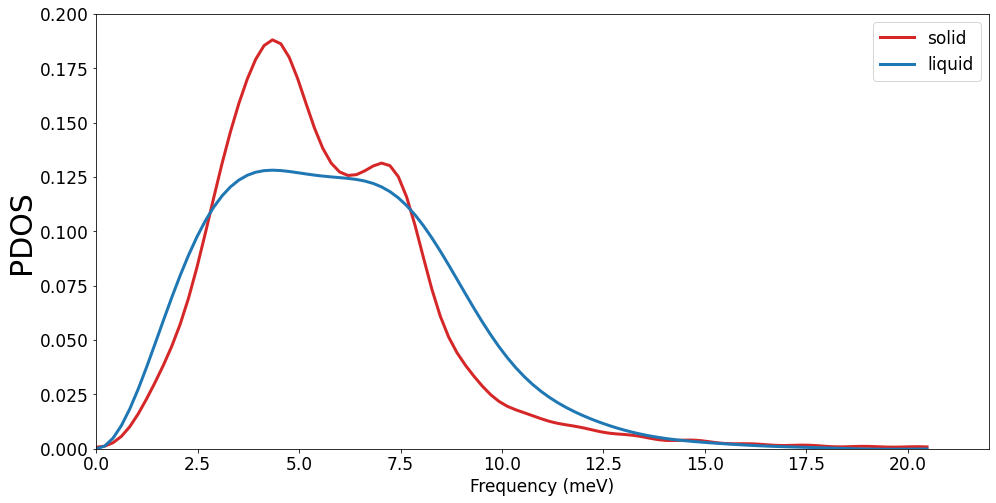

In [11]:
fig =plt.figure(figsize=(16,8))

#PDOS_liq = np.genfromtxt("../liquid/PDOS.dat")
#PDOS_sol = np.genfromtxt("./PDOS.dat")
gamma = 0.80*2

def lorenc(x, A, gamma, x0):
    return A*(1/2.*gamma)**2/((x - x0)**2 + 1/4.*gamma**2)

Lgamma0 = lambda x: lorenc(x, pdos_all[0,1], gamma, 0)

ax = fig.add_subplot(111)

x_lor = np.array(pdos_all[:, 0])[:, 0]
y_lor = np.array([Lgamma0(el) for el in x_lor])

pdos_all_x = np.array(pdos_all[:300, 0])[:, 0]
pdos_all_x *= 4.136
pdos_all_y = np.array(pdos_all[:300, 1])[:, 0]
#pdos_all_y[1:] *= thermo(pdos_all_x, T)[1:]

integral = riemannint(pdos_all_y, 0.05*4.136)

pdos_all_y /= integral
#ax.plot(x_lor, y_lor)
ax.plot(pdos_all_x, pdos_all_y, color='tab:red', label='{}'.format('solid'), linewidth=3)
#ax.plot(PDOS_liq[:, 0], PDOS_liq[:, 1], color='tab:blue', label='{}'.format('liquid'), linewidth=3)
#ax.plot(PDOS_sol[:, 0], PDOS_sol[:, 1]/10, color='tab:green', label='{}'.format('liquid'), linewidth=3)
#ax.plot(pdos_all[1:,0]*4.136, pdos_new[:]*4.136, color='tab:red', label='PDOS_{}'.format('all'), linewidth=3)
#plt.plot(pdos[:, 0], pdos[:, 1])

#ax.plot(pdos1[:,0], pdos1[:,1], color='tab:blue', label='PDOS_{0}'.format(type1), linewidth=3)
#ax.plot(pdos2[:,0], pdos2[:,1], color='tab:orange', label='PDOS_{0}'.format(type2), linewidth=3)
#ax.plot(pdos_total[:,0], pdos_total[:, 1], color='indianred', label='total PDOS', linewidth=3)
#ax.plot(PDOS[:, 0]/0.24180, PDOS[:, 1])
#ax.fill_between(np.squeeze(np.asarray(pdos1[:,0])), 0, np.squeeze(np.asarray(pdos_total)), facecolor='tab:olive', label = 'Total PDOS')
plt.xlabel('Frequency (meV)')
plt.ylabel('PDOS', fontsize = 30)
plt.xlim(0,22)
plt.ylim(0,0.2)
#plt.ylim(0,0.5)
#plt.xscale([0, 12/0.24180])
#plt.ylim(0,0.1)
plt.legend()
plt.savefig(path+"{0}_pdos.jpg".format(type1, type2), dpi=300)
plt.show()

In [12]:
np.savetxt("../../../Melting/Pb/liquid/PDOS_liquid.txt", PDOS_liq)
np.savetxt("../../../Melting/Pb/solid/PDOS_solid.txt", np.vstack([pdos_all_x, pdos_all_y]).T)

In [78]:
pdos_all_y /= riemannint(pdos_all_y, 0.05*4.136)

In [79]:
print(pdos_all[17,1]/pdos_all[0,1])
print(pdos_all[17,0])

221.60423786757775
0.8500000000000001


In [80]:
gamma = pdos_all[17,0]*2

def lorenc(x, A, gamma, x0):
    return A*(1/2.*gamma)**2/((x - x0)**2 + 1/4.*gamma**2)

Lgamma0 = lambda x: lorenc(x, pdos_all[0,1], gamma, 0)
print(Lgamma0(0))

0.0007481402335544331


In [81]:
from scipy.constants import physical_constants

def thermal_factor(freq, T):
    kb = physical_constants['Boltzmann constant in eV/K'][0]*1000
    return 1/np.expm1(freq/(kb*T))

thermo = thermal_factor(pdos_all[1:,0], 1100)
print(thermo.shape)
pdos_new = np.zeros(len(pdos_all[1:,1]))
for i in range(len(pdos_all[1:,1])):
    pdos_new[i] = pdos_all[1+i,1]*thermo[i, 0]

(799, 1)


In [82]:
plt.plot(pdos_all_x, pdos_all_y*thermo(pdos_all_x, 955.7))

TypeError: 'matrix' object is not callable

In [83]:
np.reshape(thermo, (len(thermo), )).shape

(1, 799)

In [84]:
np.savetxt("./PDOS.dat", pdos_all)

In [85]:
np.savetxt("./PDOS_mix.dat", pdos_all)
np.savetxt("./PDOS_unmix.dat", pdos_total)

np.savetxt("./PDOS_U.dat", pdos1)
np.savetxt("./PDOS_Mo.dat", pdos2)


NameError: name 'pdos_total' is not defined

In [86]:
vc = 20
T = 663

kb = 8.6*10**(-2)

def n(eps,T):
        return 1/(2.71828**(eps/(kb*T))-1)

def entropy(pdos_x,pdos_y,vcut):
        ent = 0
        for i in range(1, len(pdos_x)-1):
                if pdos_x[i] > vcut:
                        break
                eps = pdos_x[i]
                eps_new = pdos_x[i+1]
                deps = eps_new - eps
                print(eps)
                ent = ent + ((n(eps,T)+1)*math.log(n(eps,T)+1)-n(eps,T)*math.log(n(eps,T)))*pdos_y[i]*deps
        
        print("Entropy/atom = %f kb" % (3*ent))
        return 3*ent

#PDOS_liq = np.genfromtxt("../liquid/PDOS.dat")
entropy(pdos_all_x, pdos_all_y,vc)


0.2068
0.4136
0.6204000000000001
0.8272
1.034
1.2408000000000001
1.4476000000000002
1.6544
1.8612000000000002
2.068
2.2748000000000004
2.4816000000000003
2.6884
2.8952000000000004
3.1020000000000003
3.3088
3.5156000000000005
3.7224000000000004
3.9292000000000002
4.136
4.3428
4.549600000000001
4.756400000000001
4.9632000000000005
5.17
5.3768
5.583600000000001
5.790400000000001
5.997200000000001
6.204000000000001
6.4108
6.6176
6.824400000000001
7.031200000000001
7.238
7.444800000000001
7.6516
7.8584000000000005
8.0652
8.272
8.478800000000001
8.6856
8.8924
9.099200000000002
9.306000000000001
9.512800000000002
9.7196
9.926400000000001
10.1332
10.34
10.546800000000001
10.7536
10.960400000000002
11.167200000000001
11.374
11.580800000000002
11.787600000000001
11.994400000000002
12.201200000000002
12.408000000000001
12.6148
12.8216
13.028400000000001
13.2352
13.442
13.648800000000001
13.8556
14.062400000000002
14.269200000000001
14.476
14.682800000000002
14.889600000000002
15.096400000000003
1

10.257629487554814

In [87]:
entropy(PDOS_liq[:, 0], PDOS_liq[:, 1], vc)

0.2068
0.4136
0.6204000000000001
0.8272
1.034
1.2408000000000001
1.4476000000000002
1.6544
1.8612000000000002
2.068
2.2748000000000004
2.4816000000000003
2.6884
2.8952000000000004
3.1020000000000003
3.3088
3.5156000000000005
3.7224000000000004
3.9292000000000002
4.136
4.3428
4.549600000000001
4.756400000000001
4.9632000000000005
5.17
5.3768
5.583600000000001
5.790400000000001
5.997200000000001
6.204000000000001
6.4108
6.6176
6.824400000000001
7.031200000000001
7.238
7.444800000000001
7.6516
7.8584000000000005
8.0652
8.272
8.478800000000001
8.6856
8.8924
9.099200000000002
9.306000000000001
9.512800000000002
9.7196
9.926400000000001
10.1332
10.34
10.546800000000001
10.7536
10.960400000000002
11.167200000000001
11.374
11.580800000000002
11.787600000000001
11.994400000000002
12.201200000000002
12.408000000000001
12.6148
12.8216
13.028400000000001
13.2352
13.442
13.648800000000001
13.8556
14.062400000000002
14.269200000000001
14.476
14.682800000000002
14.889600000000002
15.096400000000003
1

10.17900640993339

In [88]:
10.179 - 10.258

-0.07899999999999885

In [32]:
riemannint(PDOS_liq[:, 1], PDOS_liq[1, 0] - PDOS_liq[0, 0])

1.0

In [68]:
pdos = np.genfromtxt('./PDOS.dat')
pdos

array([[0.00000000e+00, 0.00000000e+00],
       [5.00000000e-02, 1.12805751e-03],
       [1.00000000e-01, 4.28973063e-03],
       ...,
       [3.98500000e+01, 3.44239831e-04],
       [3.99000000e+01, 3.45824029e-04],
       [3.99500000e+01, 3.43728052e-04]])

In [60]:
3.6171 - (9.026201655222309 - 7.593885176102553)

2.1847835208802446

In [39]:
np.squeeze(np.asarray(pdos_total))

NameError: name 'pdos_total' is not defined

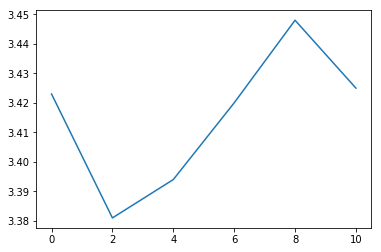

In [12]:
x_s = [0, 2, 4,6,8, 10]
s = [3.423, 3.381, 3.394, 3.420, 3.448, 3.425]

plt.plot(x_s, s)

In [32]:
pdos = np.genfromtxt('PDOS.dat')

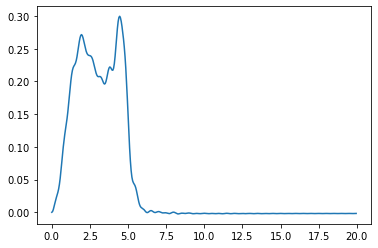

In [33]:
plt.plot(pdos[:, 0], pdos[:, 1])


In [41]:
import numpy as np
import copy
from gmpy2 import mpfr, get_context
get_context().precision=400

from GPPhad import create_from_scratch, retrain, consts
from GPPhad import cov_real, GP_full, print_point

ModuleNotFoundError: No module named 'GPPhad'

In [40]:
from numpy import random

a = random.normal(0, 1, 10000)*5

In [43]:
a.std()

4.9959501936605815